<img src="http://gi-mosm.dem.isel.pt/compdrill/img/logo_isel.png" style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

### Instituto Superior de Engenharia de Lisboa
### Licenciatura Em Informática e Multimética
# Codificação de Sinais Multimédia

## TRABALHO PRÁTICO 1

Trabalho realizado por:
* Luís Fonseca    - 45125
* João Rodrigues  - 45145
* Rodrigo Matela  - 46316

*Turma 41D*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Introdução

Este primeiro trabalho prático da cadeira de Codificação de Sinais Multimédia foca-se nas primeiras matérias lécionadas, que são, respetivamente, o uso da biblioteca *`OpenCV`*, biblioteca esta que nos permite utilizar, manipular e processar vários formatos de ficheiros de imagens em Python.

Foram ainda abordadas as matérias referentes à Taxa de Compressão, ao SNR ao PSNR, bem como uma forma de ruído digital designado por Dithering, que vai ser abordado ao longo do trabalho prático.

Por fim, foram utilizadas mais duas bibliotecas, `Numpy`, para uso de cálculos, `Matplotlib`, para realizar gráficos e histogramas, bibliotecas estas que já vimos utilizando em todas as cadeiras de Sinais (PDS e CPS). A imagem utilizada neste trabalho, tal como em todas as cadeiras de sinais lecionadas até ao momento, é a imagem *`lenac.tif`*, e é a partir desta imagem que todo o trabalho vai ser desenvolvido.

Este primeiro trabalho prático, apesar de concluído, foi um algo desafiante perante todos os incovenientes que surgiram e pela falta de apoio devido ao encerramento da faculdade.


<img src="https://i.imgur.com/VUL29fb.png" style="width: 800px; margin: 0 40px 40px 40px;"></img>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 1

Para este primeiro exercício era necessária a utilização da biblioteca *`OpenCV`*, como já referido, biblioteca que nos vai permitir então trabalhar com o ficheiro de imagem *`lenac.tif`*, e é pedido para abrir o ficheiro, e para apresentar o mesmo.

Primeiramente, vamos realizar os imports que vão ser necessários ao longo do projeto: Biblioteca OpenCV, Numpy e MatplotLib:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

De seguida, para se poder abrir o ficheiro e visualizar o ficheiro de imagem, é utilizado o seguinte código, tendo por base a biblioteca *`OpenCV`*:

In [3]:
x_img = cv2.imread("lenac.tif")
cv2.imshow('Original Image', x_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

O código `cv2.imread` permite a abertura/leitura de um ficheiro de imagem em Python, e o código `cv2.imshow` permite a visualização do mesmo.
Porém, apenas o código para visualizar a imagem não é suficiente, pois é necessário o mesmo ser seguido por duas instruções:

* `cv2.waitKey(0)`, que permite a visualização infinitamente da imagem, até que alguma tecla seja pressionada (caso não fosse 0, mas outro número, como exemplo 25, a imagem seria visualizada durante 25 ms, após os quais a janela se fecharia automaticamente);

* `cv2.destroyAllWindows()`, que permite fechar a janela com qualquer tecla, quando esta for pressionada.

Para finalizar o exercício, eram ainda fornecidas 2 linhas de código:

In [4]:
print(x_img.dtype)
print(x_img.shape)

uint8
(512, 512, 3)


E era pedido para explicar a funcionalidade dos métodos `dtype` e `shape`.

* ***dtype*** - é utilizado para indicar o data type da imagem. Quanto maior o data type, melhor a qualidade da imagem, pois tem um maior range de cores.

* ***shape*** - indica as propriedades da imagem (retorna um tuplo com o número de linhas, colunas e canais - se a imagem tiver cor)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 2

Para este exercício, foi pedido que fosse gravada a imagem original num diferente formato, neste caso foi utilizado o formato `jpeg`.
Para realizar a gravação de uma imagem, é utilizado o método `cv2.write`, que recebe como argumentos o título da imagem, com o formato que se deseja adquirir, a imagem a ser gravada, e ainda um terceiro argumento da biblioteca `OpenCV`, "*IMWRITE_JPEG_QUALITY*". Este método pega numa imagem e aplica-lhe uma qualidade, em percentagem (de máximo 100%). Para o exercício foi aplicada 80% e 10%.

As duas linhas seguintes de código foram as usadas para obter as duas imagens em formato `jpeg`:

In [5]:
cv2.imwrite('file1.jpg', x_img, (cv2.IMWRITE_JPEG_QUALITY, 80))
cv2.imwrite('file2.jpg', x_img, (cv2.IMWRITE_JPEG_QUALITY, 10))

True

Seguem-se as imagens convertidas para formato `jpeg` que foram obtidas através do código acima:

<center>Imagem jpeg com qualidade com percentagem 80%:</center>

<center><img src="https://i.imgur.com/rmBlvX4.jpg" width="250px"></center>

<center>Imagem jpeg com qualidade com percentagem 10%:</center>
<center><img src="https://i.imgur.com/S7zgYoz.jpg" width="250px"></center>

Segue-se ainda uma comparação entre a imagem original em formato `tif` (à esquerda) e a imagem `jpeg` (à direita):

<center>Imagem tif à esquerda e imagem jpeg com qualidade de percentagem 80%:</center>

<center><img src="https://i.imgur.com/LkORccW.png" width="450px"></center>

<center>Imagem tif à esquerda e imagem jpeg com qualidade de percentagem 10%:</center>
<center><img src="https://i.imgur.com/q3wzn04.png" width="450px"></center>

Após a gravação das imagens em `jpeg`, e da comparação entre a original e as mesmas, pode verificar-se que existe perda de qualidade, e, portanto, diminuição do tamanho do ficheiro. Para verificar as diferenças entre as imagens (`taxa de compressão, SNR e PSNR`) em Python, foi utilizado o seguinte código:

In [8]:
import os

def compressionRate(img1name, img2name):
    
    sizeO = os.path.getsize(img1name)
    sizeA = os.path.getsize(img2name)
    taxaCompressao = sizeO/sizeA
    
    return taxaCompressao
    
def PSNR(pic1,pic2):

    MSE = np.mean((pic1.astype("uint8") - pic2.astype("uint8")) ** 2 )
    pixMAX = 255.0
    return 20*np.log10(pixMAX) - 10*np.log10(MSE)

def SNR(img1,img2):
    Psinal = np.sum(np.sum((img2*1.0)**2))
    Perro = (np.sum(np.sum(((img2*1.0)-(img1*1.0))**2)))
    return 10*np.log10(Psinal/Perro)

Para calcular a taxa de compressão entre dois ficheiros, é necessário utilizar a biblioteca `os`. Depois, basta executar a divisão entre o ficheiro original e o ficheiro novo e verificar qual a taxa de compressão.

Para o SNR, foi utilizada a fórmula `10log10(Psinal/Perro)`. A potência do sinal e do erro foram calculadas externamente através das fórmulas acima. O PSNR *(peak signal-to-noise ratio)* é mais facilmente definido através do MSE *(mean squared error)*, pelo que se foi calcular o mesmo, para depois ser utilizado na fórmula final.

Estando a maneira de calcular estas 3 variáveis definida, fomos então obter os valores concretos da taxa de compressão, SNR e PSNR:

In [9]:
# ---------- SNR ------------
    
imgjpg1 = cv2.imread('file1.jpg')
imgjpg2 = cv2.imread('file2.jpg')
     
SNR1 = SNR(x_img, imgjpg1)
SNR2 = SNR(x_img, imgjpg2)
print("SNR lenac.tif -> file1.jpg (jpg80): " + str(SNR1))
print("SNR lenac.tif -> file2.jpg (jpg10): " + str(SNR2))
print()

# ---------- TAXA COMPRESSAO ---------
  
taxaCompressao1 = compressionRate('lenac.tif', 'file1.jpg')
taxaCompressao2 = compressionRate('lenac.tif', 'file2.jpg')

print("TAXA DE COMPRESSAO lenac.tif -> file1.jpg (jpg80): " + str(taxaCompressao1))
print("TAXA DE COMPRESSAO lenac.tif -> file2.jpg (jpg10): " + str(taxaCompressao2))
print()

# ---------- PSNR ---------
 
PSNR1 = PSNR(x_img, imgjpg1)
PSNR2 = PSNR(x_img, imgjpg2)
print("PSNR lenac.tif -> file1.jpg (jpg80): " + str(PSNR1))
print("PSNR lenac.tif -> file2.jpg (jpg10): " + str(PSNR2))

SNR lenac.tif -> file1.jpg (jpg80): 28.27406107288294
SNR lenac.tif -> file2.jpg (jpg10): 22.2094180678214

TAXA DE COMPRESSAO lenac.tif -> file1.jpg (jpg80): 17.763845302869527
TAXA DE COMPRESSAO lenac.tif -> file2.jpg (jpg10): 82.33717036416911

PSNR lenac.tif -> file1.jpg (jpg80): 34.396097488682855
PSNR lenac.tif -> file2.jpg (jpg10): 30.69811939599407


Como podemos observar pelos resultados obtidos, o SNR entre o ficheiro de imagem com 10% de qualidade jpeg e o ficheiro original é mais pequeno, pelo que possui mais ruído. O que possui 80% de qualidade jpeg possui um SNR maior, pelo que possui menos ruído (o que é confirmado na prática).

Em relação à taxa de compressão, é bem maior a compressão entre a imagem original e a imagem jpeg com 10% qualidade, do que a imagem jpeg 80%, pois a imagem com 10% qualidade possui muito menos qualidade que a imagem de 80% qualidade, sendo que o tamanho do ficheiro fica bastante reduzido em relação não só ao ficheiro original, mas também ao próprio ficheiro jpeg com 80% qualidade. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 3

Para este exercíco foi pedido que convertesse-mos a imagem original para uma imagem Grayscale. Uma imagem Grayscale é uma imagem composta por níveis de cinzento, variando entre o preto com menor intensidade e o branco com maior intensidade.

Neste tipo de imagem, o valor de cada pixel é um espaço de amostra que representa o valor do brilho entre preto e branco, e para o 
cálculo desse valor é usado o algoritmo: `(Y=R∗299/1000+G∗587/1000+B∗114/1000)`, estando este relacionado com a sensibilidade visual do olho humano para cores primárias.

Para a conversão da imagem, utilizámos o método `cv2.cvtColor`, que respeita a fórmula mencionada em cima, passando-lhe dois argumentos: o primeiro corresponde à imagem original; o segundo faz a conversão para o efeito grayscale, obtendo uma imagem em tons de preto e branco.

É de notar que o ficheiro resultante desta transformação é cerca de três vezes mais pequeno que o ficheiro original.
Segue-se o código utilizado para a resolução deste exercício:

In [22]:
def obterGreyscale():
    x_img_g = cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
    return x_img_g

def exe3():
    x_img_g = obterGreyscale()
    cv2.imshow('Gray Image', x_img_g)
    cv2.imwrite('file3.bmp', x_img_g)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
exe3()

Com o código acima, a imagem a preto e branco fica guardada com o nome `file3.bmp`, e é ainda aberta e mostrada com o código *`cv2.imshow`*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 4

Neste exercício era pedido para apresentar o histograma da imagem (em tons de cinzento) e verificar quantos tons de cinzento tem a imagem.

Os níveis de cinzento da imagem são: 215


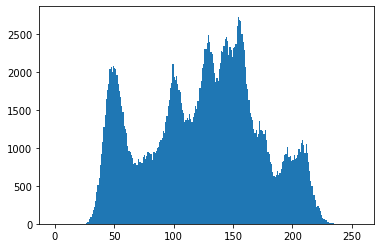

In [24]:
def exe4():
    x_img_g = obterGreyscale()
    plt.hist(x_img_g.ravel(), 256, [0, 256])
    niveisCinzento = np.unique(x_img_g).size
    print("Os níveis de cinzento da imagem são: " + str(niveisCinzento))
exe4()

Como podemos observar, no eixo dos ***`x`*** está representado o número de níveis de cinzento, e no eixo dos ***`y`*** está representado o número de ocorrências de cada nível. Para determinar exatamente os níveis de cinzento foi utilizado o método `np.unique` da biblioteca `Numpy`, que recebe como argumento a imagem em tons de cinza, e retorna todos os valores existentes de cinzento, não havendo repetições entre os mesmos, pelo que para determinar o número de níveis basta obter o tamanho do array, através de `size`.

Como podemos observar, a imagem em tons de cinzento tem precisamente 215 níveis de cinza, pelo que nenhum deles se aproxima de 0 (totalmente preto) nem 255 (totalmente branco).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 5

No exercício 5 era pedido para criar 8 novas imagens a partir da imagem `file3.bmp`, ou seja, a imagem original em tons de cinza, obtida na alínea anterior. Neste exercício iniciamos com a imagem a tons de cinza original, sem qualquer ruído, considerando que quando iniciamos o exercício o bit de maior peso é o `2**7`, ou seja, 128. Este bit permite-nos guardar uma grande parte da informação da imagem, conseguindo observar a imagem cinza sem praticamente nenhum ruído, ao contrário dos restantes bits, que vão sendo cada vez de menor peso (e, consequentemente, maior ruído aplicado), até atingir o bit de menor peso (imagem cheia de ruído).

Para a realização deste exercício, usámos a operação lógica de interseção (`and`) para pudermos alterar o número de bits. Como era necessário obter 8 imagens, realizámos um ciclo `for` com **8** iterações, que realizasse em cada uma delas, a dita operação lógica `and`. Segue-se o código utilizado:

In [26]:
def exe5():
    x_img_g = obterGreyscale()
    for i in range(8):
        img = np.bitwise_and(x_img_g,2**i)
        cv2.imshow('BW ' +  str(i), (img * 255).astype("uint8"))
        
    cv2.waitKey(0)
    cv2.destroyAllWindows()
exe5()

Com a deslocação do bit de maior peso, vamos obtendo, a cada imagem seguinte, sucessivamente maior ruído, até que o ruído na imagem é tanto que a imagem é indecifrável. Esta interceção lógica realiza-se da seguinte maneira: no valor inicial temos o valor binário 100000000, e a cada interseção realizada, o bit a **1** vai ser deslocado para a direita (`shift`), o que vai levar a diminuição do espaço para guardar a imagem, o que por sua vez cria o ruído que se pode observar:

<center><img src="https://i.imgur.com/BfuHbZN.png" width="800px"></center>

Como podemos observar, da esquerda para a direita, o bit vai aumentando, ficando a imagem cada vez com menos ruído, e sendo mais percetível.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 6

No exercício 6 era pedido para realizar o algoritmo de `Dithering`. O Dithering é uma forma de ruído digital aplicado intencionalmente, e é usado na sua maioria das vezes no processamento de dados em ambos áudio e video. Dithering é uma técnica em que se intercalam píxeis de duas cores diferentes entre duas áreas adjacentes, para no fim criarmos uma tonalidade de tons variantes dessas áreas adjacentes. Este método possibilita-nos a obtenção de tons de cores que, de outra forma, nao se obteriam.

Utilizando o método atribuído no enunciado, pudemos chegar ao seguinte código:

In [27]:
def dithering(img):
    height,width= img.shape
    imgFinal = np.zeros(img.shape, np.uint8)
    for y in range(height-1):
        for x in range(width-1):
            oldPixel = img.item(y,x)
            newPixel = 255 if oldPixel > 127 else 0
            imgFinal.itemset(y,x,newPixel)
            erroQuantizado = oldPixel-newPixel
            img.itemset(y,x+1,img.item(y,x+1) + erroQuantizado * 7/16)
            img.itemset(y+1,x+1,img.item(y+1,x+1) + erroQuantizado * 3/16)
            img.itemset(y+1,x,img.item(y+1,x) + erroQuantizado * 5/16)
            img.itemset(y+1,x-1,img.item(y+1,x-1) + erroQuantizado * 1/16)
    return imgFinal

def exe6():
    x_img_g = obterGreyscale()
    y = dithering(x_img_g)
    cv2.imshow('Dither',y)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
exe6()

A imagem que se obteve foi a seguinte:

<center><img src="https://i.imgur.com/4qH712s.png" width="300px"></center>

Como podemos observar, existe um tipo diferente de ruído na imagem, e o código utilizado segue a fórmula/método atribuído no enunciado (adicionar um determinado valor consoante a vizinhança da posição onde o pixel esteja localizado).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 7

Neste exercício era pedido que construíssemos uma função que conseguisse gravar a matriz obtida na questão anterior (questão 6 - matriz com Dithering aplicado) para um ficheiro binário. Um ficheiro binário é todo o ficheiro de computador que não está em formato texto. Este pode ser um programa de computador, ficheiro de imagem digital, ficheiro de som, biblioteca compartilhada, arquivo de dados e vários outros arquivos.

Pedia ainda para calcular a taxa de compressão, SNR e PSNR.

Como um ficheiro binário pode ser qualquer tipo de ficheiro de imagem digital, o grupo decidiu gravar a matriz afetada com Dithering num ficheiro de formato `bmp`. Utilizando as funções de taxa de compressão, SNR e PSNR criadas na alínea 2, fomos também realizar o cálculos de cada um desses parâmetros. Segue-se o código utilizado neste exercício:

In [29]:
def exe7():
    x_img_g = obterGreyscale()
    y = dithering(x_img_g)
    cv2.imwrite('Dither.bmp', y)
    fileDither = cv2.imread('Dither.bmp')
    
    taxaCompressao = compressionRate('lenac.tif' ,'Dither.bmp')
    snr = SNR(x_img, fileDither)
    psnr = PSNR(x_img, fileDither)
    
    print("TAXA DE COMPRESSAO lenac.tif -> Dither.bmp: " + str(taxaCompressao))
    print("SNR lenac.tif -> Dither.bmp: " + str(snr))
    print("PSNR lenac.tif -> Dither.bmp: " + str(psnr))
exe7()

TAXA DE COMPRESSAO lenac.tif -> Dither.bmp: 2.989165039396403
SNR lenac.tif -> Dither.bmp: 2.9070702967584587
PSNR lenac.tif -> Dither.bmp: 27.838074879920434


Como podemos observar, a taxa de compressão entre a imagem original `lenac.tif` e a imagem em tons de cinza afetada com ruído através do Dithering é de cerca de 2.99 (aproximadamente 3), pelo que a imagem afetada com Dithering é cerca de 3 vezes mais pequena que a original (em termos de tamanho do ficheiro). Em relação ao SNR, possui o SNR muito pequeno, pelo que possui imenso ruído, o que era expectável, uma vez que o ruído foi introduzido intencionalmente em grande escala. O PSNR é ainda 27.84, arredondando às centésimas.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exercício 8

Para o último exercício, era pedido que fosse construída uma função, no qual se gerava uma imagem monocromática, com dimensões 100x100. 
Para isso foi construído o método de nome “monochromeImage”, que recebe como parâmetros um “ângulo” que permite indicar o número os graus do ângulo pretendido, e “tamanho” para o desenho de uma janela.

Dentro deste método foram criadas duas variáveis: “*width*” e “*height*”, que contêm o tamanho da a janela; outra variável de nome “img”, onde vai ser criada a imagem; e outra de nome “radius” que contém a fórmula de cálculo para os ângulos. De seguida, recorremos a dois “for's” que vão percorrer a nossa imagem (visto que a nossa imagem é uma matriz que contém diferentes valores), permitindo assim manipular os valores que se encontram dentro da imagem, convertendo-os para 0(preto) ou 255(branco). 
Para fazer a mudança de cor dos pixéis, era necessário dividir a imagem em quadrantes, por isso as variáveis “*eixoX*” e “*eixoY*” permitem fazer a divisão da janela em quatro quadrantes (os quais correspondem a cada bloco da nossa matriz onde estão armazenados os valores).

Sendo necessário que fosse feito o desenho da cor de cada quadrante, recorreu-se a uma função do numpy “*np.arctan()*”, a qual permite calcular o inverso da tangente (divisão de cosseno sobre seno).

Como o arctan não aceita divisões por zero, foi feita uma condição “if”, caso o valor da divisão fosse 0, então o valor do ângulo, por defeito, iria ser de `pi/2`. Para verificar que a cor branca percorria todos os quadrantes, foram realizadas todas as condições, como por exemplo, caso o “*eixoX*” e “*eixoY*” fossem menores que zero, era somado ao valor do ângulo pi. No final da função, sempre que a divisão do ângulo estivesse dentro do intervalo estabelecido, então o valor dos pixéis era convertido para branco. É de salientar que quando colocamos o valor do ângulo a 1 (ou outros valores mais pequenos), no centro da janela, existe o fenómeno aliasing, que consiste num efeito que faz com que sinais diferentes se tornem indistinguíveis quando amostrados.

In [31]:
def monochromeImg(angulo,tamanho):
    width = int(tamanho) 
    height = int(tamanho) 
    radius = angulo * np.pi/180.0
    img = np.zeros((width,height)) 
    for x in range(width): 
        for y in range(height): 
            eixoX = (float) (x - (width/2))
            eixoY = (float) (y - (height/2))
            if eixoX == 0: 
                ang = np.pi/2.
                if eixoY < 0: 
                    ang +=  np.pi 
            else:
                ang = np.arctan(eixoY/eixoX) 
            if(eixoX < 0) & (eixoY < 0):  
                ang=np.arctan(eixoY/eixoX)
            if((eixoX < 0) & (eixoY > 0)): 
                ang += np.pi
            if(eixoX > 0)& (eixoY < 0): 
                ang += 2*np.pi
            if(eixoX < 0) & (eixoY < 0): 
                ang += np.pi
                   
            for i in range(360//angulo): 
                if (radius*i*2 <= ang <= radius*(i*2+1) ):
                    img[y][x] = 255 
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def exe8():

    monochromeImg(1,400)
    
exe8()

Segue-se a imagem obtida através do código desenvolvido:

<center><img src="https://i.imgur.com/eLp27QW.png" width="300px"></center>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Conclusão

Com a realização deste trabalho prático foram obtidos conhecimentos de métodos e funcionalidades da biblioteca *`OpenCV`*, importantes para o processamento de imagens. O grupo concretizou os objetivos propostos no enunciado, o que facilitou a aprendizagem acerca desta matéria. 

Conseguimos perceber como é feita a manipulação de imagens, as suas propriedades e os diferentes resultados que podemos obter quando utilizamos os diferentes métodos da biblioteca mencionada. Foi também possível reparar nos diferentes formatos de imagens, e quais aqueles que podem perder ou manter a sua informação. Outro tópico a salientar, é o facto podermos manipular os pixéis de cada imagem, obtendo outro tipo de resultados, como por exemplo, o exercício onde é pedido para construir o algorítmo de Floyd–Steinberg Dithering, ou o exercício onde é pedido para construir uma imagem monocromática, tudo isto à base da manipulação dos pixéis.

Resumidamente, todos objetivos foram alcançados dentro dos nossos conhecimentos, surgindo algumas dificuldades na realização/execução dos diferentes exercícios, em certos instantes aquando da realização do trabalho, devido à falta de alguns conhecimentos que ainda não foram abordados, não o tendo sido devido aos últimos acontecimentos que têm ocorrido. Posto isto, o grupo conseguiu adquirir conhecimentos de toda a matéria lecionada, estando preparado para a execução dos próximos trabalhos práticos.